In [ ]:
from joblib import load

X_train = load('X_train.joblib')
y_train = load('y_train.joblib')
X_valid = load('X_valid.joblib')
y_valid = load('y_valid.joblib')

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(in_features=300, out_features=4, dtype=torch.float64)
X_train = torch.from_numpy(X_train)
X_valid = torch.from_numpy(X_valid)
y_train = torch.from_numpy(np.array(y_train))
y_valid = torch.from_numpy(np.array(y_valid))

epochs = 100
lr = 0.2
momentum = 0.9
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)
  loss.backward()
  optimizer.step()
  print('epoch', epoch+1, 'train loss:', loss.item(), end=' ')
  train_loss_list.append(loss.item())
  train_acc = sum(torch.max(y_pred, 1)[1] == y_train).item() / len(y_train)
  print('train acc:', train_acc, end=' ')
  train_acc_list.append(train_acc)
  y_pred_val = model(X_valid)
  loss_val = criterion(y_pred_val, y_valid)
  print('val loss:', loss_val.item(), end=' ')
  val_loss_list.append(loss_val.item())
  val_acc = sum(torch.max(y_pred_val, 1)[1] == y_valid).item() / len(y_valid)
  print('val acc:', val_acc)
  val_acc_list.append(val_acc)

epoch 1 train loss: 1.3942058278754732 train acc: 0.1547976011994003 val loss: 1.3599866568921741 val acc: 0.4550224887556222
epoch 2 train loss: 1.3595308825186616 train acc: 0.4729197901049475 val loss: 1.3025249350082988 val acc: 0.5989505247376312
epoch 3 train loss: 1.3017624252517588 train acc: 0.5924850074962519 val loss: 1.236766252922879 val acc: 0.658920539730135
epoch 4 train loss: 1.235584524593093 train acc: 0.6583583208395802 val loss: 1.1754524307516865 val acc: 0.684407796101949
epoch 5 train loss: 1.1737756678334605 train acc: 0.6928410794602698 val loss: 1.126052554335576 val acc: 0.7091454272863568
epoch 6 train loss: 1.1238436589046463 train acc: 0.7144865067466267 val loss: 1.0902847023769173 val acc: 0.7256371814092953
epoch 7 train loss: 1.0875389597350165 train acc: 0.734164167916042 val loss: 1.0659313107437416 val acc: 0.7421289355322339
epoch 8 train loss: 1.0626639946600027 train acc: 0.7470014992503748 val loss: 1.0492214844023877 val acc: 0.753373313343328

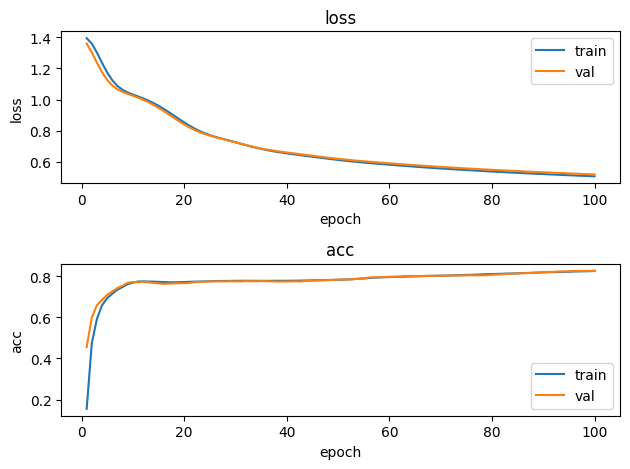

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot([i+1 for i in range(epochs)], train_loss_list, label='train')
ax1.plot([i+1 for i in range(epochs)], val_loss_list, label='val')
ax2.plot([i+1 for i in range(epochs)], train_acc_list, label='train')
ax2.plot([i+1 for i in range(epochs)], val_acc_list, label='val')
ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.set_ylabel('acc')
ax1.set_title('loss')
ax2.set_title('acc')
ax1.legend()
ax2.legend()
plt.tight_layout()